In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"

In [4]:
df = pd.read_csv("Sample - Superstore.csv", encoding = 'latin-1')

In [6]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Converting Date columns

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [16]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [24]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,order day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,11,1


# Extracting Month, Year and Day of the year

In [22]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['order day of week']= df['Order Date'].dt.dayofweek

# 1. You need to calculate the monthly sales of the store and identify which month had the highest sales and which month had the lowest sales.

In [40]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index().round(2)

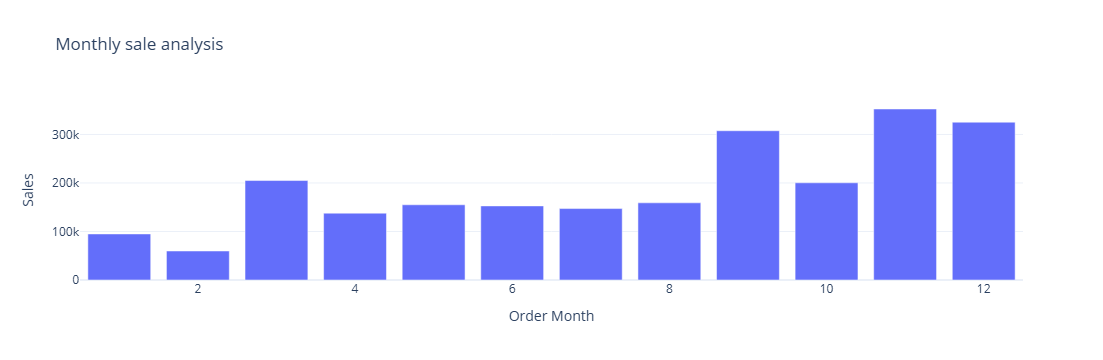

In [46]:
fig = px.bar(sales_by_month,
              x='Order Month',
              y = 'Sales',
              title = 'Monthly sale analysis')
fig.show()

Conclusion:

The monthly sales analysis shows a steady performance through most of the year with a significant surge in the final quarter. While the early months experienced slow sales, the strong year-end growth indicates effective sales strategies or seasonal demand boosts. Overall, the business demonstrates positive momentum heading into the year’s close.

# 2. You need to analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.

In [51]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index().round(2)

In [53]:
sales_by_category

,Category,Sales
0,Furniture,741999.80
1,Office Supplies,719047.03
2,Technology,836154.03


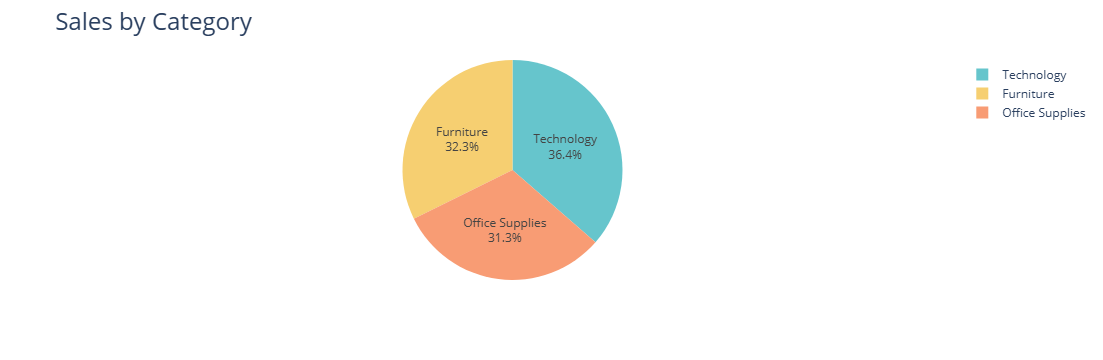

In [85]:
fig = px.pie(sales_by_category,
              values ='Sales',
              names = 'Category',
              color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.update_layout(title_text='Sales by Category', title_font = dict(size=24))

fig.show()

Conclusion:

Technology leads overall sales, suggesting it is the company’s most profitable product category. However, the shares are relatively balanced, indicating that all three categories — Technology, Furniture, and Office Supplies — play important roles in maintaining stable revenue.

# 3. The sales analysis needs to be done based on sub-categories.

In [73]:
sales_by_sub_category = df.groupby('Sub-Category')['Sales'].sum().reset_index().round(2)

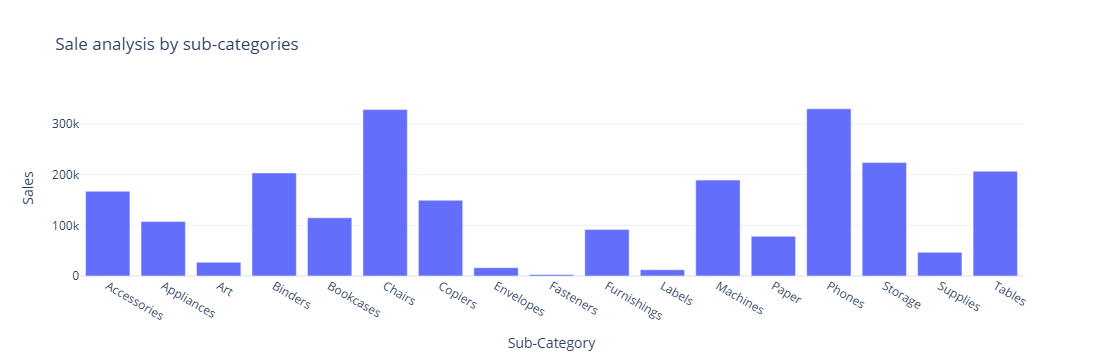

In [79]:
fig = px.bar(sales_by_sub_category,
              x= 'Sub-Category',
              y = 'Sales',
              title = 'Sale analysis by sub-categories')
fig.show()

Conclusion:

Sales are primarily driven by Chairs and Phones, making them the most valuable sub-categories. However, the wide range of performance across categories suggests opportunities to improve or promote weaker products like Art and Envelopes to achieve a more balanced sales distribution.

# 4. You need to analyze the monthly profit from sales and determine which month had the highest profit.

In [89]:
profit_by_month = df.groupby('Order Month')['Profit'].sum().reset_index().round(2)
profit_by_month

,Order Month,Profit
0,1,9134.45
1,2,10294.61
2,3,28594.69
3,4,11587.44
4,5,22411.31
5,6,21285.80
6,7,13832.66
7,8,21776.94
8,9,36857.48
9,10,31784.04


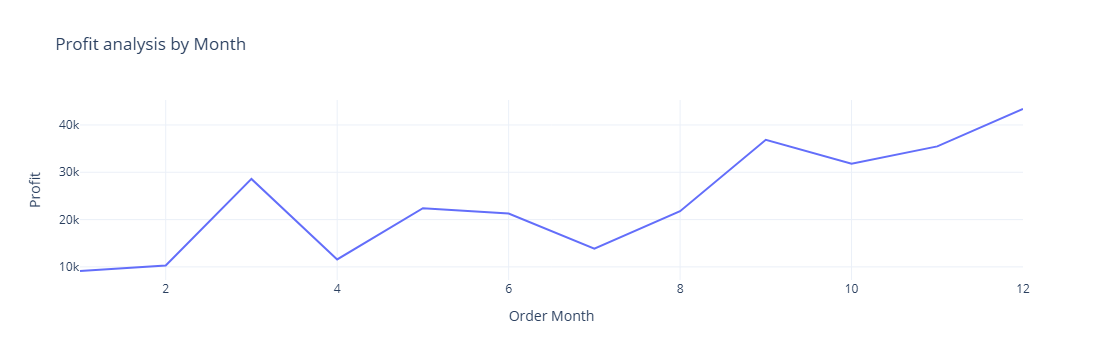

In [91]:
fig = px.line(profit_by_month,
              x='Order Month',
              y = 'Profit',
              title = 'Profit analysis by Month')
fig.show()

Conclusion:

Profits exhibit a gradual upward trend throughout the year, with the highest gains achieved in the final quarter. This suggests effective business strategies, increased sales efficiency, or seasonal demand contributing to stronger year-end profitability.

# 5. Analyze the profit by category and sub-category.

In [95]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index().round(2)

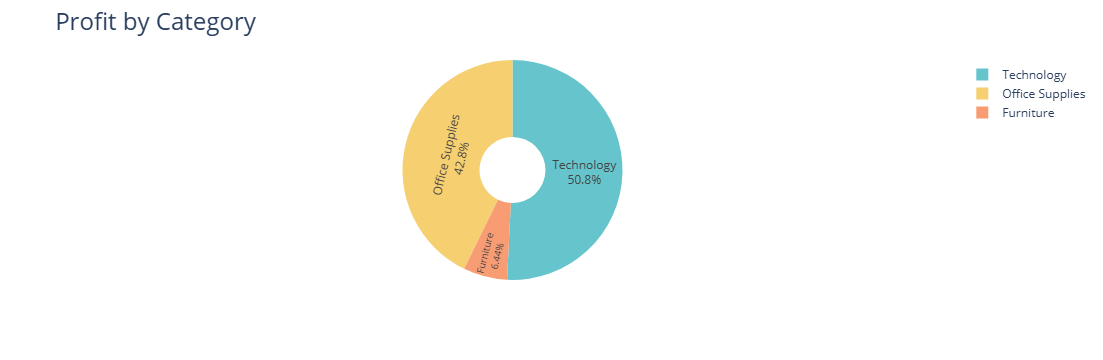

In [103]:
fig = px.pie(profit_by_category,
              values ='Profit',
              names = 'Category',
              hole = 0.3,
              color_discrete_sequence = px.colors.qualitative.Pastel)
fig.update_traces(textposition = 'inside', textinfo = 'percent + label')
fig.update_layout(title_text='Profit by Category', title_font = dict(size=24))

fig.show()

Conclusion:

The Technology category dominates profit generation, indicating high-margin products and effective sales strategies. Meanwhile, Office Supplies also perform well, supporting steady revenue. However, the Furniture category requires strategic review — possibly cost reduction or pricing adjustments — to improve its profitability contribution.

# 6. Analyze the sales and profit by customer segment.

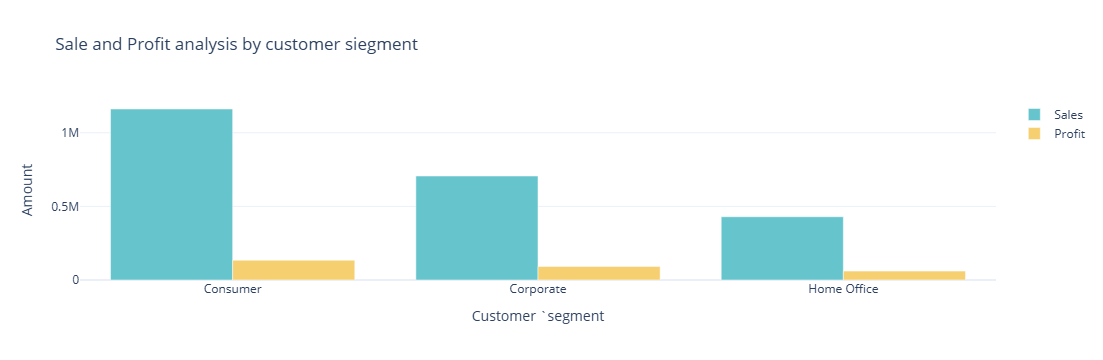

In [140]:
sales_profit_by_Segment = df.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index().round(2)

color_palette = colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_Segment['Segment'],
                    y=sales_profit_by_Segment['Sales'],
                    name='Sales',
                    marker_color=color_palette[0]))

fig.add_trace(go.Bar(x=sales_profit_by_Segment['Segment'],
                    y=sales_profit_by_Segment['Profit'],
                    name='Profit',
                    marker_color=color_palette[1]))

fig.update_layout(title_text='Sale and Profit analysis by customer siegment', xaxis_title="Customer `segment", yaxis_title="Amount")

fig.show()

# 7. Analyze the sales to profit ratio.

In [151]:
sales_profit_by_Segment = df.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

sales_profit_by_Segment['sales_to_profit_ratio'] = round(sales_profit_by_Segment['Sales']/sales_profit_by_Segment['Profit'],2)
print(sales_profit_by_Segment[['Segment','sales_to_profit_ratio']])

       Segment  sales_to_profit_ratio
0     Consumer                   8.66
1    Corporate                   7.68
2  Home Office                   7.13
